In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()

import lib.fetch as fetch
import lib.preprocess as preprocess
import lib.analysis as analysis

path="./data/"

##### links
Fetching Quandl API [link](https://blog.quandl.com/api-for-commodity-data) <br>
CHRIS index dataset [link](https://www.quandl.com/data/CHRIS-Wiki-Continuous-Futures/documentation/introduction)

# Building the dataset

### Commodity index-database - CHRIS
###### understanding the data structure hierachy
- CHRIS_metadata.csv
    - contains all 600 futures from all markets
    - ~4000 rows ~8 for each future
    
### Applying market filter
- we choose CME (chicaco mercantile exchange)
- filter by desired market to get all cme 

### Filter futures using regular expression OR take them all
As we can see every future consists of multiple sub-codes 
We apply regex to only receive only one desired future (the first)

### Fetching data from Quandl & Save to .csv

CHRIS/ + future + .column
- .0 Date
- .1 Open
- .2 High
- .3 Low
- .4 Last
- .5 Change
- .6 Settle
- .7 Volume
- .8 Previous Day Open Interest

In [ ]:
df_futures = fetch_chris_from_quandl()
df_futures.to_csv(path+EXCHANGE+"_commodities_all.csv")

## Loading
- CME_futures_unique.csv
- CME_futures_all.csv

In [2]:
df_futures = pd.read_csv(path+"CME_futures_all.csv", index_col=0)
df_futures.iloc[:,:].head()

,CHRIS/CME_0D1 - Last,CHRIS/CME_0D2 - Last,CHRIS/CME_0D3 - Last,CHRIS/CME_0D4 - Last,CHRIS/CME_0D5 - Last,CHRIS/CME_0F1 - Last,CHRIS/CME_0F2 - Last,CHRIS/CME_1N1 - Last,CHRIS/CME_1N2 - Last,CHRIS/CME_1N3 - Last,...,CHRIS/CME_Z931 - Last,CHRIS/CME_Z932 - Last,CHRIS/CME_Z933 - Last,CHRIS/CME_Z934 - Last,CHRIS/CME_Z94 - Last,CHRIS/CME_Z95 - Last,CHRIS/CME_Z96 - Last,CHRIS/CME_Z97 - Last,CHRIS/CME_Z98 - Last,CHRIS/CME_Z99 - Last
Date,,,,,,,,,,,,,,,,,,,,,
1959-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting NaN Values

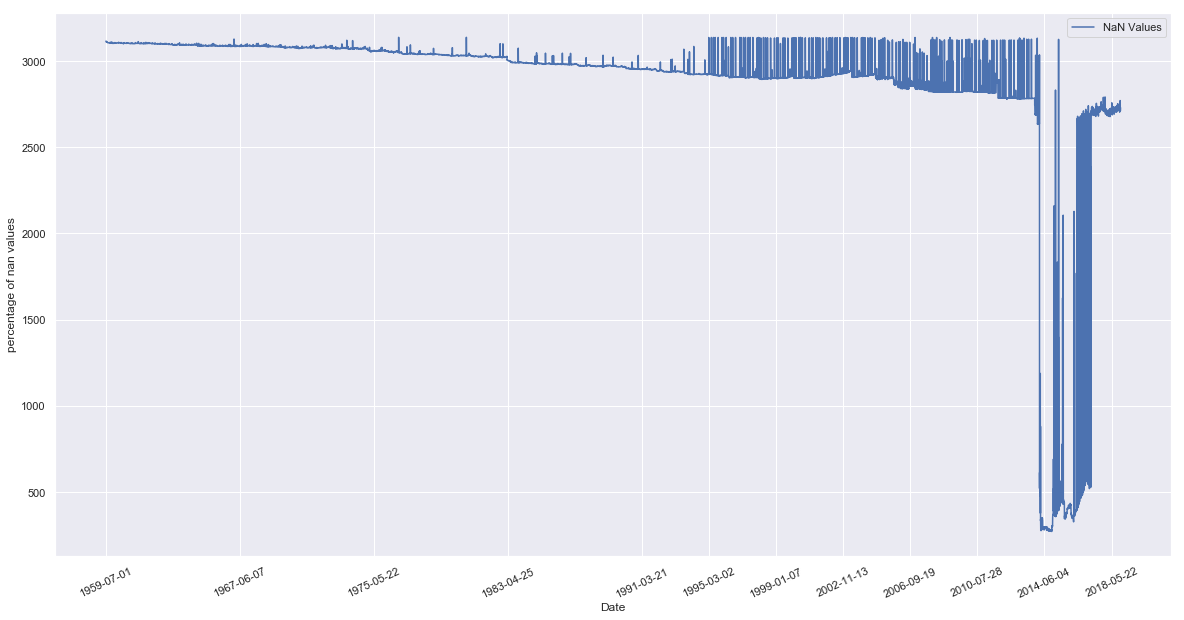

NaNs in df:  43279337


In [3]:
preprocess.missingValues(df_futures, 0, percentage=False)

## Clean and Export
###### *run only once
- renaming of filenames
- Log returns
- remove only nan columns
- Selection onwards from 2014-2018
- save clean data to json

In [3]:
df_futures = preprocess.clean(df_futures)
df_filtered_futures = preprocess.select_interval(df_futures, 13927)
df_filtered_futures.to_csv("./data_clean/CME_futures_all_clean.csv")
df_filtered_futures.head()

raw:  (15135, 3139)
futures containing only nan:  48
cleaned:  (15135, 3091)


,CME_0D1-Last,CME_0D2-Last,CME_0D3-Last,CME_0D4-Last,CME_0D5-Last,CME_0F1-Last,CME_0F2-Last,CME_1N1-Last,CME_1N2-Last,CME_1N3-Last,...,CME_Z931-Last,CME_Z932-Last,CME_Z933-Last,CME_Z934-Last,CME_Z94-Last,CME_Z95-Last,CME_Z96-Last,CME_Z97-Last,CME_Z98-Last,CME_Z99-Last
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-19,-0.000148,-0.001980,-0.002538,-0.002567,-0.002732,-0.003380,-0.003418,-0.000497,-0.002449,-0.002240,...,0.001404,0.001211,0.001321,0.001308,0.023761,0.002956,0.015565,0.015663,0.016373,0.017627
2014-02-20,0.000658,0.002082,0.001760,0.001595,0.001538,0.003335,0.002628,0.003401,0.011781,0.010875,...,0.008812,0.009069,0.008902,0.008815,0.000221,0.004211,0.000489,0.000372,0.003222,0.005224
2014-02-21,-0.000842,-0.002326,-0.002833,-0.003223,-0.003390,-0.003681,-0.003783,-0.002630,-0.008730,-0.008495,...,-0.004765,-0.004793,-0.004902,-0.004854,0.017901,-0.002516,0.010919,0.010773,0.006917,0.012035
2014-02-24,0.000769,0.005027,0.005927,0.006258,0.006297,0.002758,0.004510,-0.000282,0.003514,0.003824,...,-0.002793,-0.002709,-0.002627,-0.002602,-0.018454,-0.003993,-0.015960,-0.015803,-0.010059,-0.016757
2014-02-25,-0.001954,-0.012438,-0.012070,-0.011444,-0.011189,-0.011752,-0.011538,-0.000343,-0.007418,-0.008679,...,0.001000,0.000906,0.000659,0.000978,0.005530,0.004009,0.003113,0.002987,0.004957,0.013194


# Analysis
- load clean frame

In [22]:
df_filtered_futures = pd.read_csv("./data_clean/CME_futures_all_clean.csv")
df_filtered_futures.set_index('Date', inplace=True)
df_filtered_futures.head()

,CME_0D1-Last,CME_0D2-Last,CME_0D3-Last,CME_0D4-Last,CME_0D5-Last,CME_0F1-Last,CME_0F2-Last,CME_1N1-Last,CME_1N2-Last,CME_1N3-Last,...,CME_Z931-Last,CME_Z932-Last,CME_Z933-Last,CME_Z934-Last,CME_Z94-Last,CME_Z95-Last,CME_Z96-Last,CME_Z97-Last,CME_Z98-Last,CME_Z99-Last
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-19,-0.000148,-0.001980,-0.002538,-0.002567,-0.002732,-0.003380,-0.003418,-0.000497,-0.002449,-0.002240,...,0.001404,0.001211,0.001321,0.001308,0.023761,0.002956,0.015565,0.015663,0.016373,0.017627
2014-02-20,0.000658,0.002082,0.001760,0.001595,0.001538,0.003335,0.002628,0.003401,0.011781,0.010875,...,0.008812,0.009069,0.008902,0.008815,0.000221,0.004211,0.000489,0.000372,0.003222,0.005224
2014-02-21,-0.000842,-0.002326,-0.002833,-0.003223,-0.003390,-0.003681,-0.003783,-0.002630,-0.008730,-0.008495,...,-0.004765,-0.004793,-0.004902,-0.004854,0.017901,-0.002516,0.010919,0.010773,0.006917,0.012035
2014-02-24,0.000769,0.005027,0.005927,0.006258,0.006297,0.002758,0.004510,-0.000282,0.003514,0.003824,...,-0.002793,-0.002709,-0.002627,-0.002602,-0.018454,-0.003993,-0.015960,-0.015803,-0.010059,-0.016757
2014-02-25,-0.001954,-0.012438,-0.012070,-0.011444,-0.011189,-0.011752,-0.011538,-0.000343,-0.007418,-0.008679,...,0.001000,0.000906,0.000659,0.000978,0.005530,0.004009,0.003113,0.002987,0.004957,0.013194


## Future Preselection V1 - Biggest full Frame
*Attention to lookahead-bias

In [40]:
# example: find biggest frame for asset with most days and futures with full data
sample_asset="CME_Z97-Last"
df_new = analysis.find_biggest_full_frame(sample_asset,df_filtered_futures)
print("nans for: ",sample_asset, " = ", preprocess.get_Total_NaN_of_df(df_new))

nans for:  CME_Z97-Last  =  0


In [9]:
df_biggest_frames=analysis.biggest_frames(df_filtered_futures)

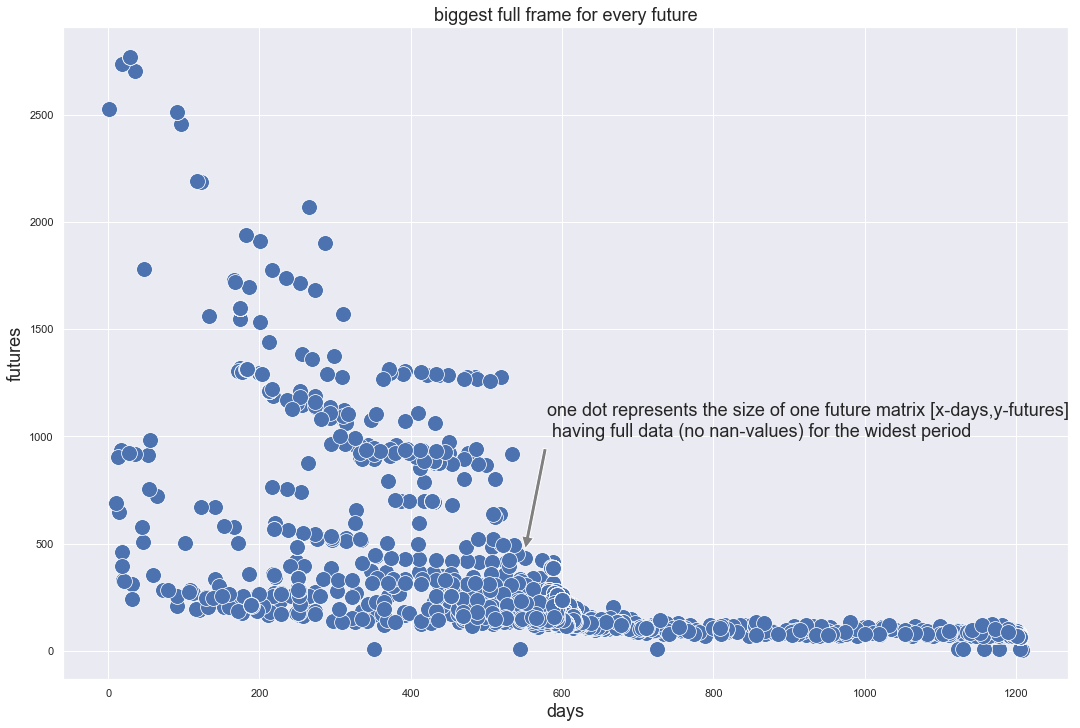

In [10]:
analysis.scatter_plot_biggest_frames(df_biggest_frames)

## Future Preselection V2 - Rolling Windows

In [54]:
df_ftr = df_filtered_futures

## Future Preselection V2 - Rolling Windows

In [55]:
# make rolling windows of size r to preselect futures that have 
r = 20
df_rolling = df_ftr.rolling(r, center=True, min_periods=int(r/2)).mean() # min_periods=1

# only nan cols
nullcolumns = df_rolling.isnull().all()
print("futures containing only nan: ", nullcolumns.sum())

df_rolling = df_rolling.dropna(axis=1, how='all')
print(df_rolling.shape)

futures containing only nan:  7
(1208, 3084)


In [58]:
# del
old = df_ftr[df_ftr['CME_0D1-Last'].notnull()]
old['CME_0D1-Last'].shape

(598,)

In [59]:
# del
new = df_rolling[df_rolling['CME_0D1-Last'].notnull()]
new['CME_0D1-Last'].shape

(584,)

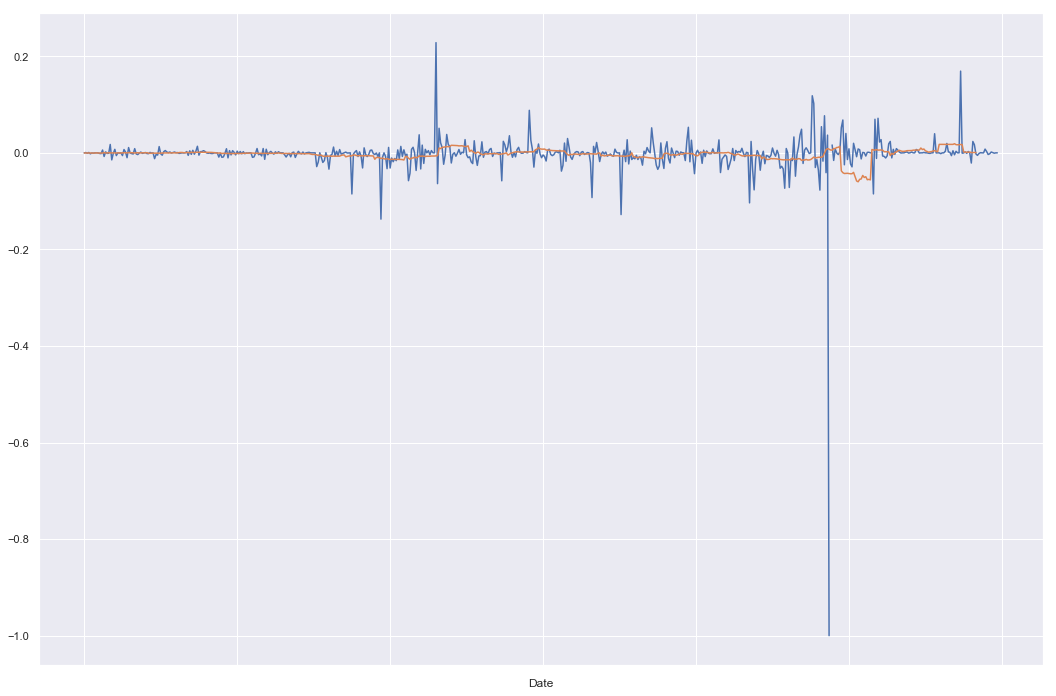

In [60]:
fig, ax = plt.subplots(figsize=(18, 12))
old['CME_0D1-Last'].plot()
new['CME_0D1-Last'].plot()

## KMeans Clustering

In [48]:
from math import sqrt
from scipy.cluster.vq import kmeans,vq
from sklearn.cluster import KMeans

df_commodities = df_new
df_commodities.sample(1)


,CME_AD1-Last,CME_AD2-Last,CME_B310-Last,CME_B311-Last,CME_B312-Last,CME_B313-Last,CME_B314-Last,CME_B315-Last,CME_B316-Last,CME_B317-Last,...,CME_Z931-Last,CME_Z932-Last,CME_Z933-Last,CME_Z934-Last,CME_Z94-Last,CME_Z95-Last,CME_Z96-Last,CME_Z97-Last,CME_Z98-Last,CME_Z99-Last
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-19,0.009658,0.009694,-0.012307,-0.017053,-0.015159,-0.015184,-0.015077,-0.015362,-0.015147,-0.015094,...,0.003833,0.003514,0.003376,0.003588,0.000866,0.001409,-0.001565,-0.001533,0.0015,-0.000613


In [75]:
# Calculate average annual percentage return and volatilities over a theoretical one year period
# calc mean log-return for each asset
returns = df_commodities.replace([np.inf, -np.inf], np.nan).dropna().mean()
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = df_commodities.replace([np.inf, -np.inf], np.nan).dropna().std() 

#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

X = data
distorsions = []
returns.sample(10)

,Returns,Volatility
CME_NQ2-Last,0.000476,0.010151
CME_CL4-Last,-0.001407,0.022759
CME_Z923-Last,-0.009301,0.106705
CME_Z922-Last,-0.008813,0.106448
CME_W1-Last,-0.000651,0.017201
CME_SM8-Last,-0.000055,0.011633
CME_ED23-Last,0.000027,0.000606
CME_Z96-Last,-0.010125,0.108196
CME_BO6-Last,-0.000141,0.012636
CME_Z913-Last,-0.010617,0.104151


Text(0.5,1,'Elbow curve')

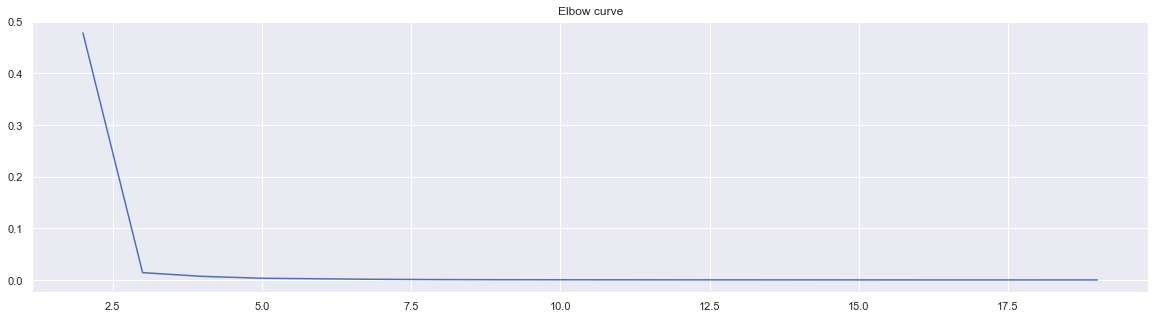

In [76]:
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(20, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

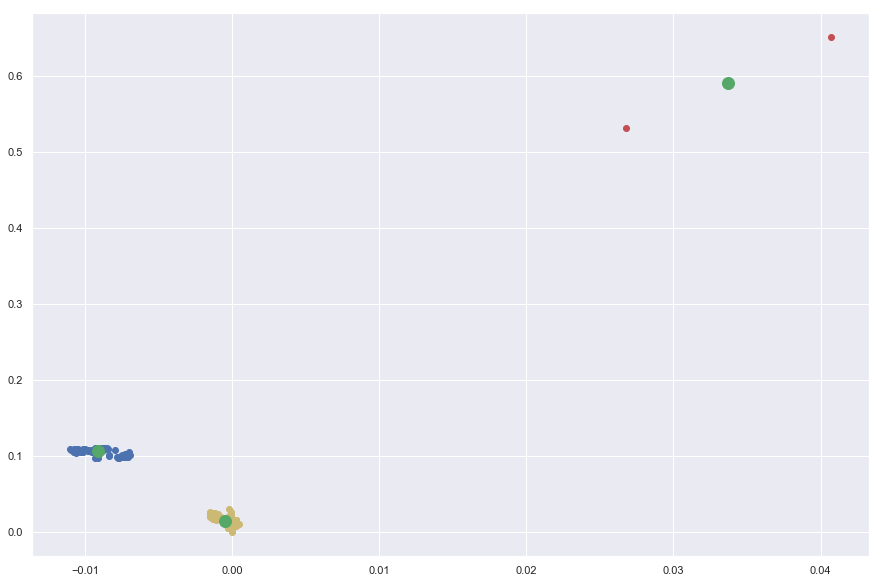

In [82]:

# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
 
# some plotting using numpy's logical indexing
fig = plt.figure(figsize=(15, 10))

plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plt.plot(centroids[:,0],centroids[:,1],'og',markersize=12)
plt.show()

In [ ]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
np.random.seed(1)

# Set the number of samples, the means and
# variances of each of the three simulated clusters
samples = 100
mu = [(7, 5), (8, 12), (1, 10)]
cov = [
    [[0.5, 0], [0, 1.0]],
    [[2.0, 0], [0, 3.5]],
    [[3, 0], [0, 5]],
]

# Generate a list of the 2D cluster points
norm_dists = [
    np.random.multivariate_normal(m, c, samples)
    for m, c in zip(mu, cov)
]
X = np.array(list(itertools.chain(*norm_dists)))

In [ ]:
norm_dists

In [50]:
# Apply the K-Means Algorithm for k=3, which is
# equal to the number of true Gaussian clusters
km3 = KMeans(n_clusters=3)
km3.fit(X)
km3_labels = km3.labels_

# Apply the K-Means Algorithm for k=4, which is
# larger than the number of true Gaussian clusters
km4 = KMeans(n_clusters=4)
km4.fit(X)
km4_labels = km4.labels_

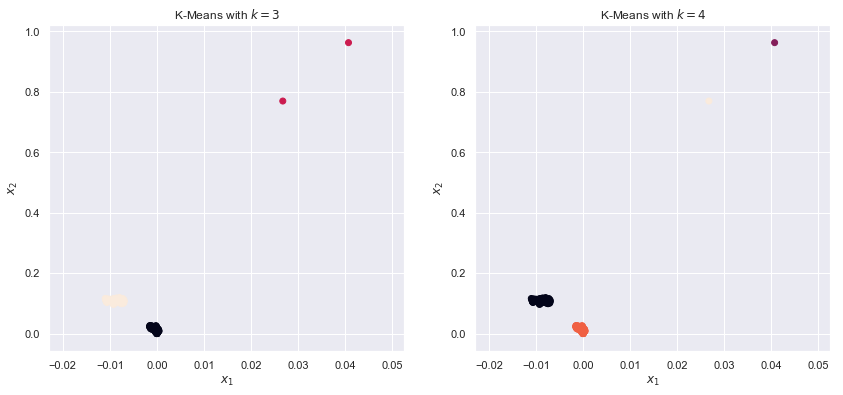

In [51]:
# Create a subplot comparing k=3 and k=4
# for the K-Means Algorithm
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.scatter(X[:, 0], X[:, 1], c=km3_labels.astype(np.float))
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title("K-Means with $k=3$")
ax2.scatter(X[:, 0], X[:, 1], c=km4_labels.astype(np.float))
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.set_title("K-Means with $k=4$")
plt.show()

## Select one Sample Future & Plot

In [ ]:
# comma error´
future_ = "CME_YW1 - Last"
sel = df_commodities[df_commodities[future_].notnull()]

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(sel[future_])
plt.show()

### TODO

- plot markets and their number c of futures

watch out for 
- one null" values!
- comma error


- calc log returns
- clip eigenvalues to sort if necessary
- rolling


    - dont drop any columns because they are considered to be duplicates 
    - example wheat_A wheat_X -> are still independent and different

### clustering algorithms
- louvre 
- k-means + cross validatiion

